In [163]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/beer-consumption-sao-paulo/Consumo_cerveja.csv


In [164]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [165]:
df=pd.read_csv('../input/beer-consumption-sao-paulo/Consumo_cerveja.csv')
df

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [166]:
df.describe()

,Final de Semana,Consumo de cerveja (litros)
count,365.000000,365.000000
mean,0.284932,25.401367
std,0.452001,4.399143
min,0.000000,14.343000
25%,0.000000,22.008000
50%,0.000000,24.867000
75%,1.000000,28.631000
max,1.000000,37.937000


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    object 
 2   Temperatura Minima (C)       365 non-null    object 
 3   Temperatura Maxima (C)       365 non-null    object 
 4   Precipitacao (mm)            365 non-null    object 
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 51.6+ KB


In [170]:
df.shape

(941, 7)

In [171]:
df.isna().sum()

Data                           576
Temperatura Media (C)          576
Temperatura Minima (C)         576
Temperatura Maxima (C)         576
Precipitacao (mm)              576
Final de Semana                576
Consumo de cerveja (litros)    576
dtype: int64

Handling Nan values

In [172]:
#drop Nan value
df=df.copy()
df=df.dropna(axis=0).reset_index(drop=True)
df

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
360,2015-12-27,24,"21,1","28,2","13,6",1.0,32.307
361,2015-12-28,"22,64","21,1","26,7",0,0.0,26.095
362,2015-12-29,"21,68","20,3","24,1","10,3",0.0,22.309
363,2015-12-30,"21,38","19,3","22,4","6,3",0.0,20.467


In [173]:
df.drop_duplicates() # no duplicates are present

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
360,2015-12-27,24,"21,1","28,2","13,6",1.0,32.307
361,2015-12-28,"22,64","21,1","26,7",0,0.0,26.095
362,2015-12-29,"21,68","20,3","24,1","10,3",0.0,22.309
363,2015-12-30,"21,38","19,3","22,4","6,3",0.0,20.467


In [174]:
df.shape

(365, 7)

changing object into float dtype

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    object 
 2   Temperatura Minima (C)       365 non-null    object 
 3   Temperatura Maxima (C)       365 non-null    object 
 4   Precipitacao (mm)            365 non-null    object 
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 20.1+ KB


In [176]:
import re

In [177]:
#coverting Object type to float
for column in ['Temperatura Media (C)', 'Temperatura Minima (C)','Temperatura Maxima (C)' ,'Precipitacao (mm)']:
     df[column]=df[column].apply(lambda x: np.float(re.sub(r',' , '.' ,x)))
    
#create Date Feature
df["Data"]=pd.to_datetime(df["Data"])
    
df["Year"]=df["Data"].apply(lambda x: x.year)
df["Month"]=df["Data"].apply(lambda x: x.month)
df["Day"]=df["Data"].apply(lambda x: x.day)
df=df.drop("Data", axis=1)

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Temperatura Media (C)        365 non-null    float64
 1   Temperatura Minima (C)       365 non-null    float64
 2   Temperatura Maxima (C)       365 non-null    float64
 3   Precipitacao (mm)            365 non-null    float64
 4   Final de Semana              365 non-null    float64
 5   Consumo de cerveja (litros)  365 non-null    float64
 6   Year                         365 non-null    int64  
 7   Month                        365 non-null    int64  
 8   Day                          365 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 25.8 KB


In [179]:
df.head() #Data is splitted into month, year and day

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Year,Month,Day
0,27.30,23.9,32.5,0.0,0.0,25.461,2015,1,1
1,27.02,24.5,33.5,0.0,0.0,28.972,2015,1,2
2,24.82,22.4,29.9,0.0,1.0,30.814,2015,1,3
3,23.98,21.5,28.6,1.2,1.0,29.799,2015,1,4
4,23.82,21.0,28.3,0.0,0.0,28.900,2015,1,5


In [180]:
df.shape

(365, 9)

In [181]:
df.nunique()

Temperatura Media (C)          277
Temperatura Minima (C)         110
Temperatura Maxima (C)         151
Precipitacao (mm)               93
Final de Semana                  2
Consumo de cerveja (litros)    359
Year                             1
Month                           12
Day                             31
dtype: int64

Handling Outliers

In [182]:
df.describe(include='all')

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Year,Month,Day
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.0,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25.401367,2015.0,6.526027,15.720548
std,3.180108,2.826185,4.317366,12.417844,0.452001,4.399143,0.0,3.452584,8.808321
min,12.900000,10.600000,14.500000,0.000000,0.000000,14.343000,2015.0,1.000000,1.000000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22.008000,2015.0,4.000000,8.000000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24.867000,2015.0,7.000000,16.000000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28.631000,2015.0,10.000000,23.000000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37.937000,2015.0,12.000000,31.000000


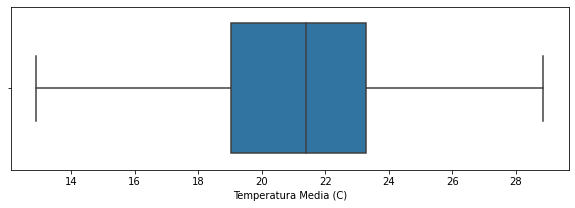

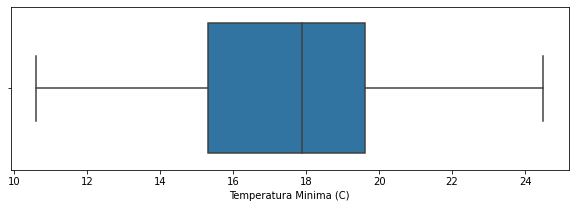

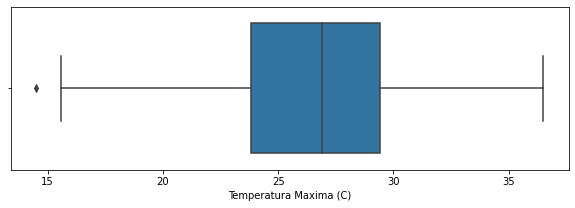

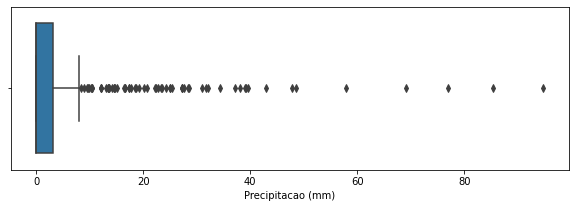

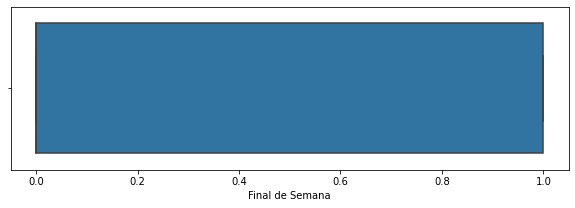

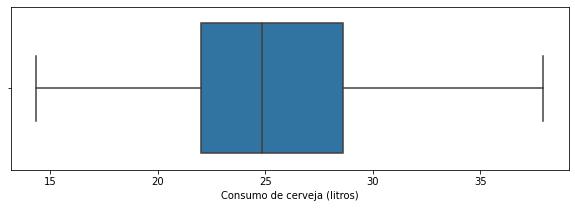

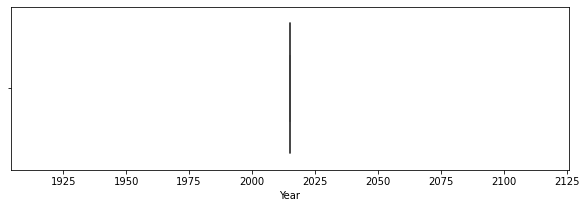

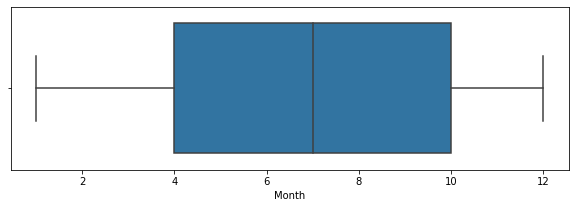

In [184]:
#finding outliers
for column in df.columns[0:-1]:
    plt.figure(figsize=(10,3))
    sns.boxplot(x=(column),data=df)

In [185]:
#removing outliers
for column in df.columns:
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    q2=q3-q1
    lower_range=q1-(1.5*q2)
    upper_range=q3+(1.5*q2)
    df[column]=np.where(df[column]<lower_range,lower_range,df[column])
    df[column]=np.where(df[column]>upper_range,upper_range,df[column])

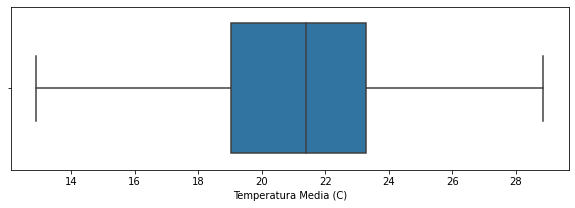

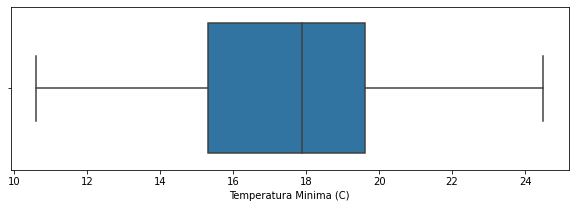

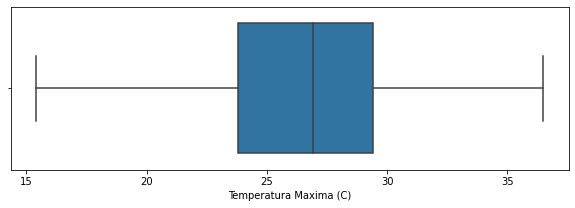

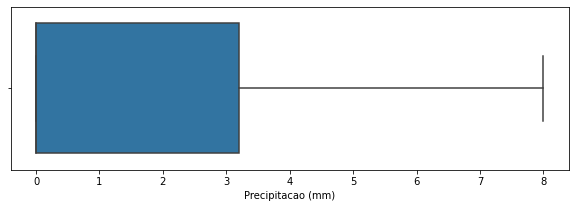

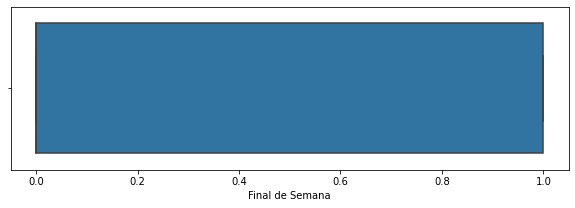

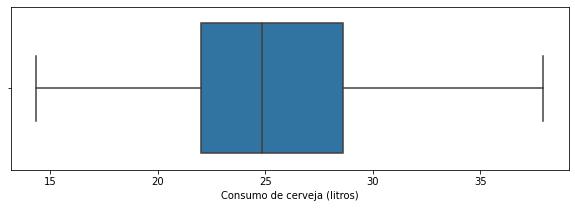

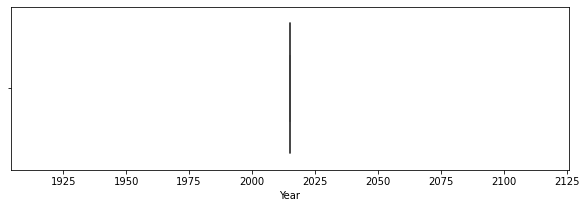

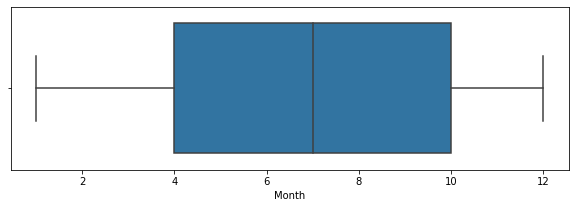

In [186]:
for column in df.columns[0:-1]:
    plt.figure(figsize=(10,3))
    sns.boxplot(x=(column),data=df)

In [187]:
df.shape

(365, 9)

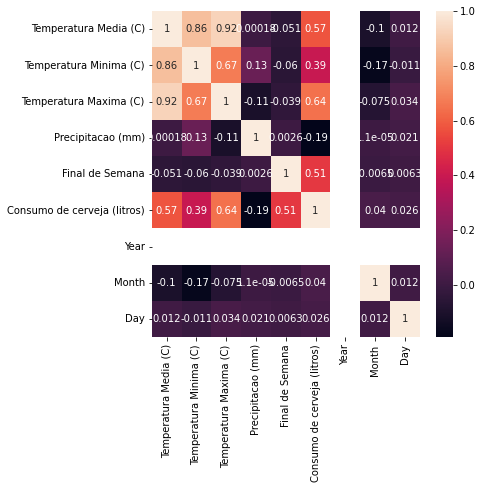

In [189]:
corr = df.corr()
features = corr.index
plt.figure(figsize=(6,6))
ax = sns.heatmap(df[features].corr(),annot=True)

In [191]:
correlation = df.corr(method='pearson')
correlation

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Year,Month,Day
Temperatura Media (C),1.000000,0.862752,0.922442,0.000181,-0.050803,0.574615,NaN,-0.103169,0.012382
Temperatura Minima (C),0.862752,1.000000,0.672661,0.133601,-0.059534,0.392509,NaN,-0.172923,-0.011206
Temperatura Maxima (C),0.922442,0.672661,1.000000,-0.108964,-0.039413,0.643133,NaN,-0.074903,0.034435
Precipitacao (mm),0.000181,0.133601,-0.108964,1.000000,0.002618,-0.191539,NaN,0.000011,0.021132
Final de Semana,-0.050803,-0.059534,-0.039413,0.002618,1.000000,0.505981,NaN,-0.006526,0.006254
Consumo de cerveja (litros),0.574615,0.392509,0.643133,-0.191539,0.505981,1.000000,NaN,0.039908,0.025969
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,-0.103169,-0.172923,-0.074903,0.000011,-0.006526,0.039908,NaN,1.000000,0.011893
Day,0.012382,-0.011206,0.034435,0.021132,0.006254,0.025969,NaN,0.011893,1.000000


In [192]:
print(correlation ['Consumo de cerveja (litros)'].sort_values(ascending=False).to_string())

Consumo de cerveja (litros)    1.000000
Temperatura Maxima (C)         0.643133
Temperatura Media (C)          0.574615
Final de Semana                0.505981
Temperatura Minima (C)         0.392509
Month                          0.039908
Day                            0.025969
Precipitacao (mm)             -0.191539
Year                                NaN


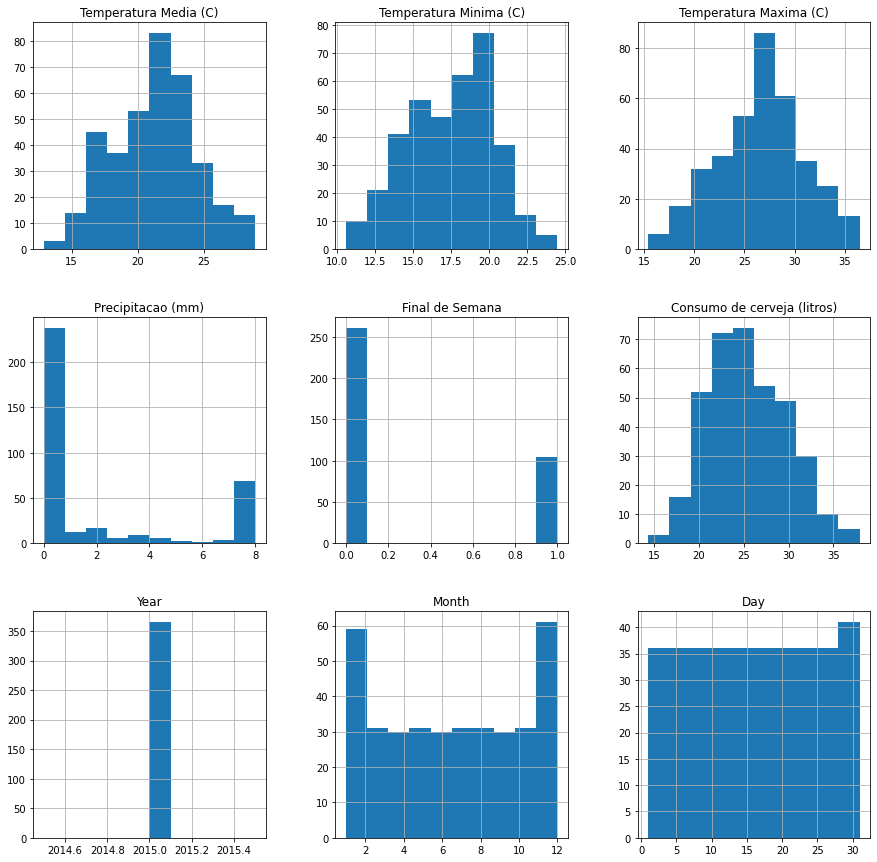

In [193]:
plot = df.hist(figsize=(15,15))

Data splitting

In [194]:
#splitting
y=df["Consumo de cerveja (litros)"].copy()
X=df.drop("Consumo de cerveja (litros)",axis=1).copy()
X

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Year,Month,Day
0,27.30,23.9,32.5,0.0,0.0,2015.0,1.0,1.0
1,27.02,24.5,33.5,0.0,0.0,2015.0,1.0,2.0
2,24.82,22.4,29.9,0.0,1.0,2015.0,1.0,3.0
3,23.98,21.5,28.6,1.2,1.0,2015.0,1.0,4.0
4,23.82,21.0,28.3,0.0,0.0,2015.0,1.0,5.0
...,...,...,...,...,...,...,...,...
360,24.00,21.1,28.2,8.0,1.0,2015.0,12.0,27.0
361,22.64,21.1,26.7,0.0,0.0,2015.0,12.0,28.0
362,21.68,20.3,24.1,8.0,0.0,2015.0,12.0,29.0
363,21.38,19.3,22.4,6.3,0.0,2015.0,12.0,30.0


Standardization

In [195]:
#Scaler
scaler=StandardScaler()
X= pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [196]:
X

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Year,Month,Day
0,1.912508,2.281333,1.367326,-0.634921,-0.631243,0.0,-1.602745,-1.673503
1,1.824340,2.493924,1.599626,-0.634921,-0.631243,0.0,-1.602745,-1.559818
2,1.131590,1.749853,0.763345,-0.634921,1.584177,0.0,-1.602745,-1.446134
3,0.867085,1.430966,0.461355,-0.253131,1.584177,0.0,-1.602745,-1.332449
4,0.816703,1.253806,0.391665,-0.634921,-0.631243,0.0,-1.602745,-1.218764
...,...,...,...,...,...,...,...,...
360,0.873383,1.289238,0.368435,1.910341,1.584177,0.0,1.587648,1.282303
361,0.445137,1.289238,0.019984,-0.634921,-0.631243,0.0,1.587648,1.395988
362,0.142846,1.005782,-0.583997,1.910341,-0.631243,0.0,1.587648,1.509672
363,0.048380,0.651463,-0.978907,1.369473,-0.631243,0.0,1.587648,1.623357


In [197]:
#train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,shuffle=True, random_state=123)

In [198]:
print('X_train shape: ',X_train.shape)
print('X_test shape: ',X_test.shape)
print('y_train shape: ',y_train.shape)
print('y_test shape: ',y_test.shape)

X_train shape:  (255, 8)
X_test shape:  (110, 8)
y_train shape:  (255,)
y_test shape:  (110,)


In [199]:
#import models and metrics
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet

In [200]:
model1= LinearRegression()
model1.fit(X_train,y_train)
print('Training accuracy : ',model1.score(X_train,y_train)*100)
print('Test accuracy : ',model1.score(X_test,y_test)*100)

Training accuracy :  72.9323112979848
Test accuracy :  67.32492053741689


In [201]:
model2=Lasso()
model2.fit(X_train,y_train)
print('Training accuracy : ',model2.score(X_train,y_train)*100)
print('Test accuracy : ',model2.score(X_test,y_test)*100)

Training accuracy :  58.289335339743296
Test accuracy :  57.65145888931502


In [202]:
model3=Ridge()
model3.fit(X_train,y_train)
print('Training accuracy : ',model3.score(X_train,y_train)*100)
print('Test accuracy : ',model3.score(X_test,y_test)*100)

Training accuracy :  72.91697700847071
Test accuracy :  67.52327918391941


In [203]:
model4=ElasticNet()
model4.fit(X_train,y_train)
print('Training accuracy :',model4.score(X_train,y_train)*100)
print('Test accuracy :',model4.score(X_test,y_test)*100)

Training accuracy : 56.78086949378303
Test accuracy : 55.981044445720315
